<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 165.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 160.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 148.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 125.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 138.4 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
df.shape

(65437, 114)

In [5]:
## Write your code here
cols = ["Employment", "JobSat", "RemoteWork"]

print("Missing values for the following columns: ")
print("-"*50+"\n")
for col in cols:
    print(col +": "+ str(df[col].isna().sum()))
print("\n"+"="*50+"\n")

Missing values for the following columns: 
--------------------------------------------------

Employment: 0
JobSat: 36311
RemoteWork: 10631




In [6]:
df[["Employment", "JobSat", "RemoteWork"]].head()

,Employment,JobSat,RemoteWork
0,"Employed, full-time",NaN,Remote
1,"Employed, full-time",NaN,Remote
2,"Employed, full-time",NaN,Remote
3,"Student, full-time",NaN,NaN
4,"Student, full-time",NaN,NaN


In [7]:
for col in ["Employment", "JobSat", "RemoteWork"]:
    print(df[col].value_counts().head(10))
    print("\n"+"="*50+"\n")
print("Unique Employment stats: "+ str(df["Employment"].nunique())) 

Employment
Employed, full-time                                                         39041
Independent contractor, freelancer, or self-employed                         4846
Student, full-time                                                           4709
Employed, full-time;Independent contractor, freelancer, or self-employed     3557
Not employed, but looking for work                                           2341
Employed, part-time                                                          1266
Student, full-time;Employed, part-time                                       1115
Employed, full-time;Student, full-time                                        897
Employed, full-time;Student, part-time                                        839
Student, full-time;Not employed, but looking for work                         686
Name: count, dtype: int64


JobSat
8.0     7509
7.0     6379
6.0     3751
9.0     3626
10.0    2251
5.0     1956
3.0     1165
4.0     1130
2.0      772
0.0      311
Name

In [8]:
jobsat_mode = df["JobSat"].mode()[0]
df["JobSat"] = df["JobSat"].fillna(jobsat_mode)

remwrk_mode = df["RemoteWork"].mode()[0]
df["RemoteWork"] = df["RemoteWork"].fillna(remwrk_mode)

for col in ["Employment","JobSat", "RemoteWork"]:
    print(f"Missing values in {col} is: "+str(df[col].isna().sum()))


Missing values in Employment is: 0
Missing values in JobSat is: 0
Missing values in RemoteWork is: 0


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [9]:
## Write your code here
df[["YearsCodePro","JobSat"]]

,YearsCodePro,JobSat
0,NaN,8.0
1,17,8.0
2,27,8.0
3,NaN,8.0
4,NaN,8.0
...,...,...
65432,3,8.0
65433,NaN,8.0
65434,5,8.0
65435,2,8.0


In [10]:
df["YearsCodePro"] = df["YearsCodePro"].fillna("Missing")
df["YearsCodePro"].isna().sum()

np.int64(0)

In [11]:
df["YearsCodePro"].unique()

array(['Missing', '17', '27', '7', '11', '25', '12', '10', '3',
       'Less than 1 year', '18', '37', '15', '20', '6', '2', '16', '8',
       '14', '4', '45', '1', '24', '29', '5', '30', '26', '9', '33', '13',
       '35', '23', '22', '31', '19', '21', '28', '34', '32', '40', '50',
       '39', '44', '42', '41', '36', '38', 'More than 50 years', '43',
       '47', '48', '46', '49'], dtype=object)

In [12]:
import numpy as np

col = 'YearsCodePro'

def convert_years(x):
    if x == 'Less than 1 year':
        return 0
    if x == 'More than 50 years':
        return 51
    if x == "Missing" or pd.isna(x):
        return np.nan 
    else:
        return float(x)

df[col+"_num"] = df[col].apply(convert_years)

bins = [0, 5, 10, 20, np.inf]
labels = ["0-5", "5-10", "10-20", "20+"]

df[col+"_cat"] = pd.cut(df[col+"_num"],bins=bins, labels=labels, right=False)

df[col+"_cat"] = df[col+"_cat"].cat.add_categories("Missing")
df[col+"_cat"] = df[col+"_cat"].fillna('Missing')

df[[col, col+"_num", col+"_cat"]].head()

,YearsCodePro,YearsCodePro_num,YearsCodePro_cat
0,Missing,NaN,Missing
1,17,17.0,10-20
2,27,27.0,20+
3,Missing,NaN,Missing
4,Missing,NaN,Missing


In [13]:
jobsat_median = df.groupby("YearsCodePro_cat")["JobSat"].median()
print("The median values for each years of experience is: " + "\n" + f"{jobsat_median}")

The median values for each years of experience is: 
YearsCodePro_cat
0-5        8.0
5-10       8.0
10-20      8.0
20+        8.0
Missing    8.0
Name: JobSat, dtype: float64


/tmp/ipykernel_375/1023371143.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jobsat_median = df.groupby("YearsCodePro_cat")["JobSat"].median()


/tmp/ipykernel_375/1107464500.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jobsat_median = df.groupby("YearsCodePro_cat")["JobSat"].median()


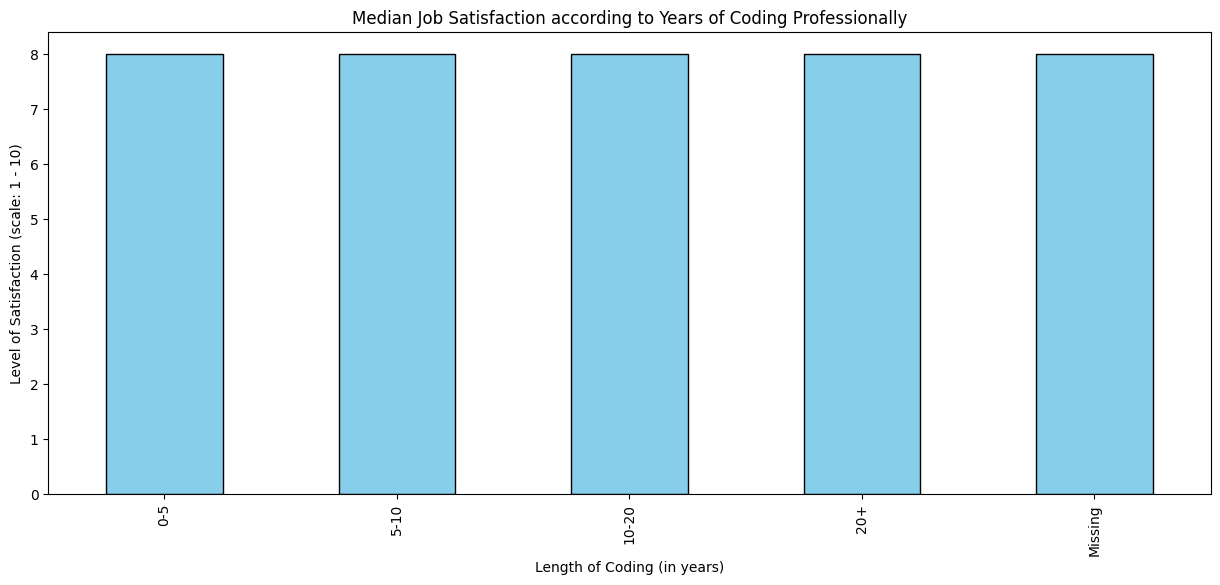

In [14]:
print("\n")

jobsat_median = df.groupby("YearsCodePro_cat")["JobSat"].median()

plt.figure(figsize=(15,6))
jobsat_median.plot(kind="bar", color='skyblue', edgecolor="black")

plt.title("Median Job Satisfaction according to Years of Coding Professionally")
plt.xlabel("Length of Coding (in years)")
plt.ylabel("Level of Satisfaction (scale: 1 - 10)") 

plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


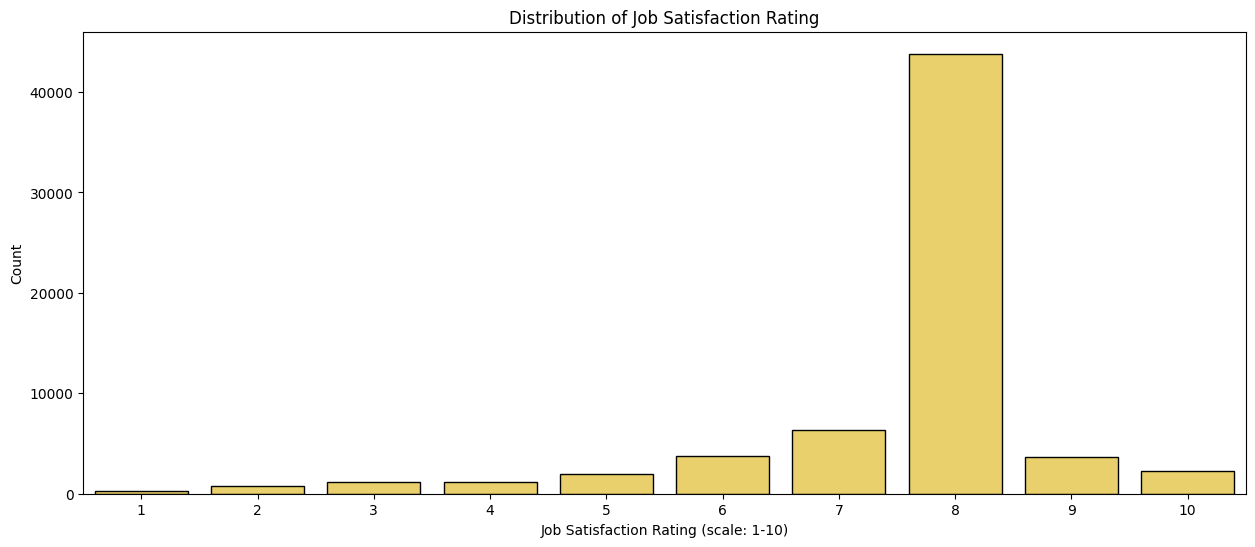

In [15]:
## Write your code here
print("\n") 
df["JobSat"] = df["JobSat"].astype(int)

plt.figure(figsize=(15, 6))

sns.countplot(x="JobSat", data=df, order=range(1,11), color = "#FFDB58", edgecolor="black")

plt.title("Distribution of Job Satisfaction Rating")
plt.xlabel("Job Satisfaction Rating (scale: 1-10)")
plt.ylabel("Count")

plt.show() 

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


In [16]:
rem_wrk = df["RemoteWork"].value_counts()
rem_wrk

RemoteWork
Hybrid (some remote, some in-person)    33646
Remote                                  20831
In-person                               10960
Name: count, dtype: int64

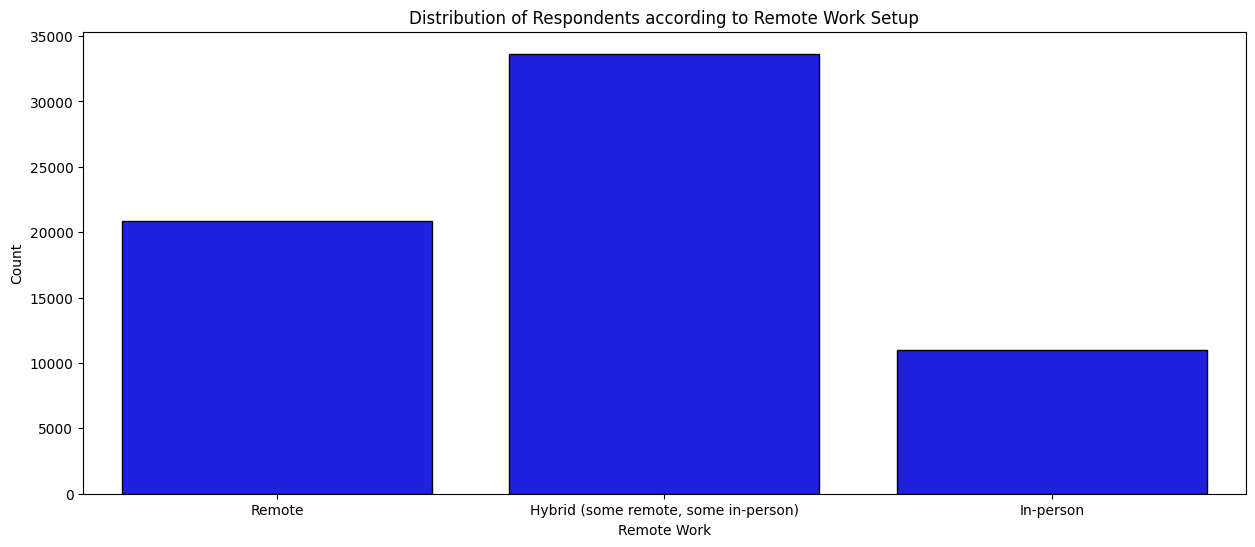

In [17]:
## Write your code here
rem_wrk = df["RemoteWork"].value_counts()
plt.figure(figsize=(15,6))

sns.countplot(x="RemoteWork", data=df, color="blue", edgecolor="black")

plt.title("Distribution of Respondents according to Remote Work Setup")
plt.xlabel("Remote Work")
plt.ylabel("Count") 

plt.show() 

In [18]:
df["MainBranch"].unique()

array(['I am a developer by profession', 'I am learning to code',
       'I code primarily as a hobby',
       'I am not primarily a developer, but I write code sometimes as part of my work/studies',
       'I used to be a developer by profession, but no longer am'],
      dtype=object)

In [19]:
df["MainBranch"].isna().sum()

np.int64(0)

In [20]:
cross_tab1 = pd.crosstab(index=[df["RemoteWork"]],
                       columns=[df["MainBranch"]],
                       margins=True) 

cross_tab1

MainBranch,I am a developer by profession,I am learning to code,"I am not primarily a developer, but I write code sometimes as part of my work/studies",I code primarily as a hobby,"I used to be a developer by profession, but no longer am",All
RemoteWork,,,,,,
"Hybrid (some remote, some in-person)",22751,3198,4002,2732,963,33646
In-person,8697,412,1289,351,211,10960
Remote,18759,265,1220,251,336,20831
All,50207,3875,6511,3334,1510,65437


In [21]:
cross_tab2 = pd.crosstab(index=[df["RemoteWork"]],
                       columns=[df["JobSat"]],
                       margins=True)
cross_tab2

JobSat,0,1,2,3,4,5,6,7,8,9,10,All
RemoteWork,,,,,,,,,,,,
"Hybrid (some remote, some in-person)",107,109,310,481,472,836,1726,2849,24373,1509,874,33646
In-person,100,75,170,269,261,450,731,1172,6778,587,367,10960
Remote,104,92,292,415,397,670,1294,2358,12669,1530,1010,20831
All,311,276,772,1165,1130,1956,3751,6379,43820,3626,2251,65437


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [22]:
## Write your code here
df["LanguageHaveWorkedWith"].isna().sum()

np.int64(5692)

In [23]:
df["LanguageHaveWorkedWith"].value_counts().head(100)

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                     1002
Python                                                              832
HTML/CSS;JavaScript;PHP;SQL                                         503
C#                                                                  452
HTML/CSS;JavaScript                                                 452
                                                                   ... 
C#;Python;SQL                                                        63
JavaScript;PHP                                                       63
Bash/Shell (all shells);HTML/CSS;Java;JavaScript;SQL;TypeScript      62
Bash/Shell (all shells);Java;SQL                                     62
Java;JavaScript;Python                                               61
Name: count, Length: 100, dtype: int64

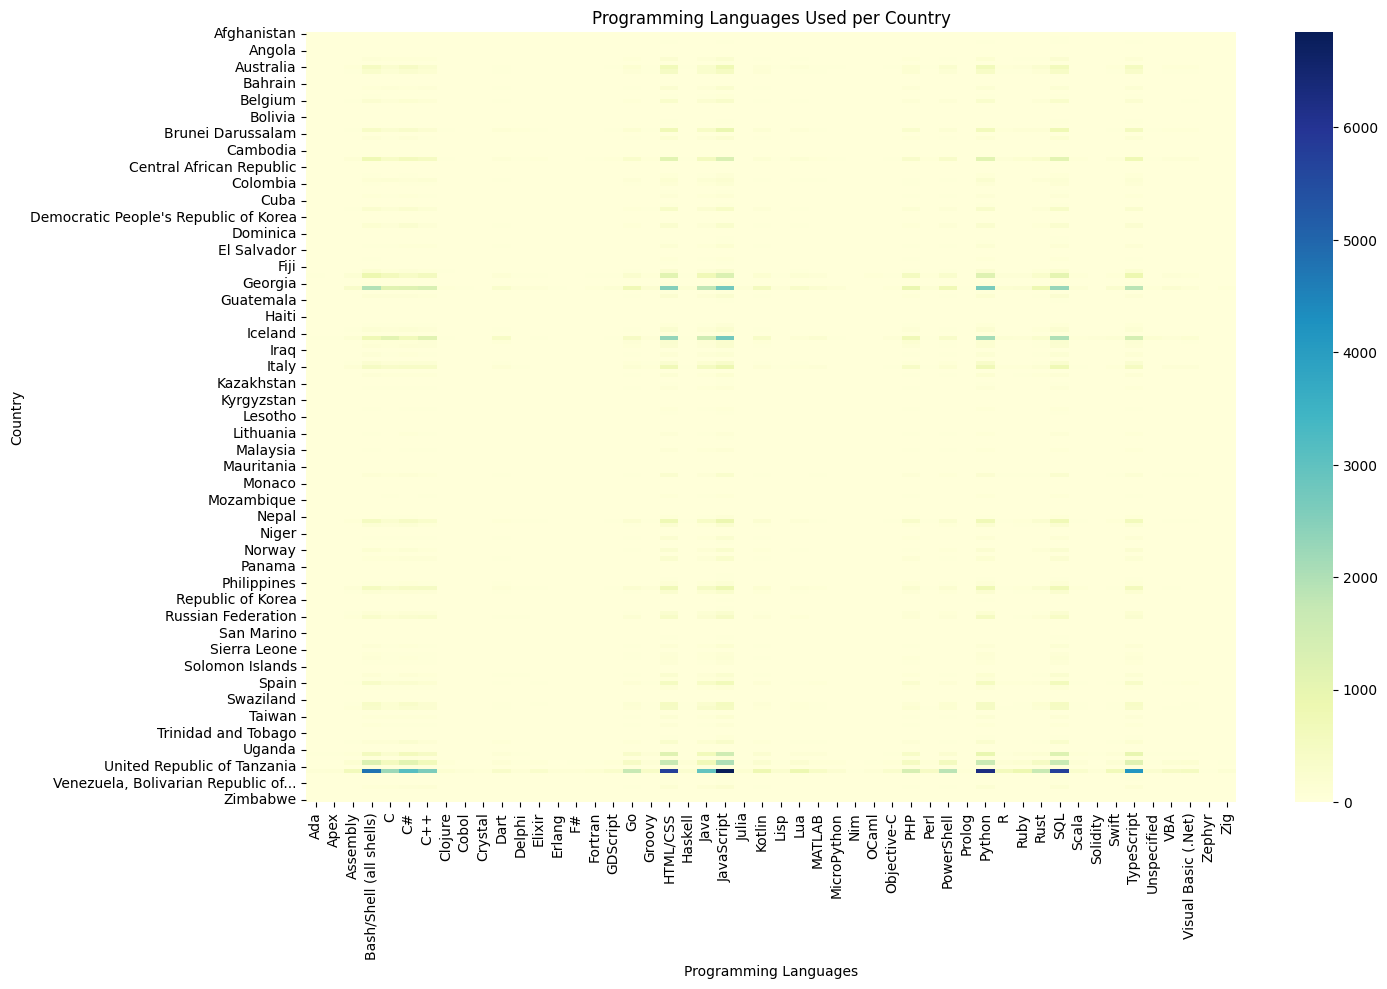

In [24]:
df["LanguageHaveWorkedWith_clean"] = df["LanguageHaveWorkedWith"].fillna("Unspecified")

df["Lang_list"] = df["LanguageHaveWorkedWith_clean"].str.split(";")

df_exploded = df.explode("Lang_list")

df_exploded["Lang_list"] = df_exploded["Lang_list"].str.strip()

lang_crosstab = pd.crosstab(df_exploded["Country"], df_exploded["Lang_list"])

plt.figure(figsize=(15, 10))

sns.heatmap(lang_crosstab,
           annot=False,
           cmap="YlGnBu")

plt.title("Programming Languages Used per Country")
plt.ylabel("Country")
plt.xlabel("Programming Languages")

plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [25]:
## Write your code here
df["JobSatPoints_1"].isna().sum()

np.int64(36113)

In [29]:
df["JobSatPoints_1"].describe()

count    29324.000000
mean        18.581094
std         25.966221
min          0.000000
25%          0.000000
50%         10.000000
75%         22.000000
max        100.000000
Name: JobSatPoints_1, dtype: float64

In [31]:
df["YearsCodePro"].describe()

count       65437
unique         53
top       Missing
freq        13827
Name: YearsCodePro, dtype: object

In [39]:
df["YearsCodePro"].unique()

array(['Missing', '17', '27', '7', '11', '25', '12', '10', '3',
       'Less than 1 year', '18', '37', '15', '20', '6', '2', '16', '8',
       '14', '4', '45', '1', '24', '29', '5', '30', '26', '9', '33', '13',
       '35', '23', '22', '31', '19', '21', '28', '34', '32', '40', '50',
       '39', '44', '42', '41', '36', '38', 'More than 50 years', '43',
       '47', '48', '46', '49'], dtype=object)

In [41]:
df["YearsCodePro_Numeric"] = df["YearsCodePro"].replace({ "Missing": np.nan, 
    'Less than 1 year': 0.5,
    'More than 50 years': 51})

df["YearsCodePro_Numeric"] = pd.to_numeric(df["YearsCodePro_Numeric"], errors="coerce")

plot_df = df[["YearsCodePro_Numeric", "JobSatPoints_1"]].dropna() 

plot_df 

,YearsCodePro_Numeric,JobSatPoints_1
1,17.0,0.0
12,12.0,0.0
15,27.0,0.0
18,10.0,10.0
20,0.5,90.0
...,...,...
65168,2.0,0.0
65178,17.0,0.0
65265,2.0,20.0
65351,7.0,0.0


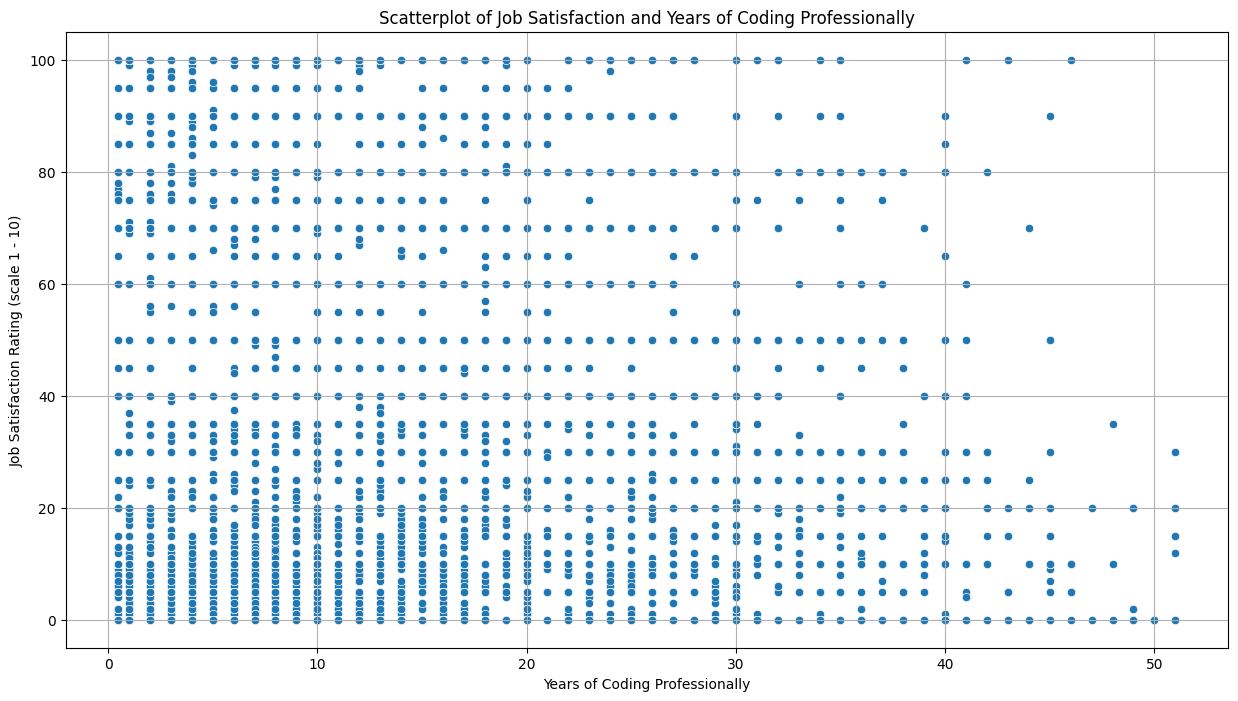

In [42]:
plt.figure(figsize=(15,8))

sns.scatterplot(data=plot_df, x="YearsCodePro_Numeric", y="JobSatPoints_1")

plt.title("Scatterplot of Job Satisfaction and Years of Coding Professionally")
plt.xlabel("Years of Coding Professionally")
plt.ylabel("Job Satisfaction Rating (scale 1 - 10)")
plt.grid(True)

plt.show() 

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [43]:
## Write your code here
df["EdLevel"].isna().sum()

np.int64(4653)

In [44]:
df["EdLevel"].unique()

array(['Primary/elementary school',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else', nan],
      dtype=object)

In [45]:
df["EdLevel"].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24942
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Some college/university study without earning a degree                                 7651
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1146
Something else                                                                          932
Name: count, dtype: int64

In [46]:
df["EdLevel"].mode()

0    Bachelor’s degree (B.A., B.S., B.Eng., etc.)
Name: EdLevel, dtype: object

In [49]:
df["Employment"].value_counts()

Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking for work;Independent contra

In [50]:
df["EdLevel"] = df["EdLevel"].fillna(df["EdLevel"].mode()[0])

crosstab_Educ_vs_Emp = pd.crosstab(df["EdLevel"], df["Employment"], margins=True, )

crosstab_Educ_vs_Emp

Employment,"Employed, full-time","Employed, full-time;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Retired","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Retired","Employed, full-time;Not employed, and not looking for work","Employed, full-time;Not employed, but looking for work","Employed, full-time;Not employed, but looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Student, part-time","Employed, full-time;Retired","Employed, full-time;Student, full-time","Employed, full-time;Student, full-time;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work;Student, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Student, part-time;Employed, part-time","Employed, full-t

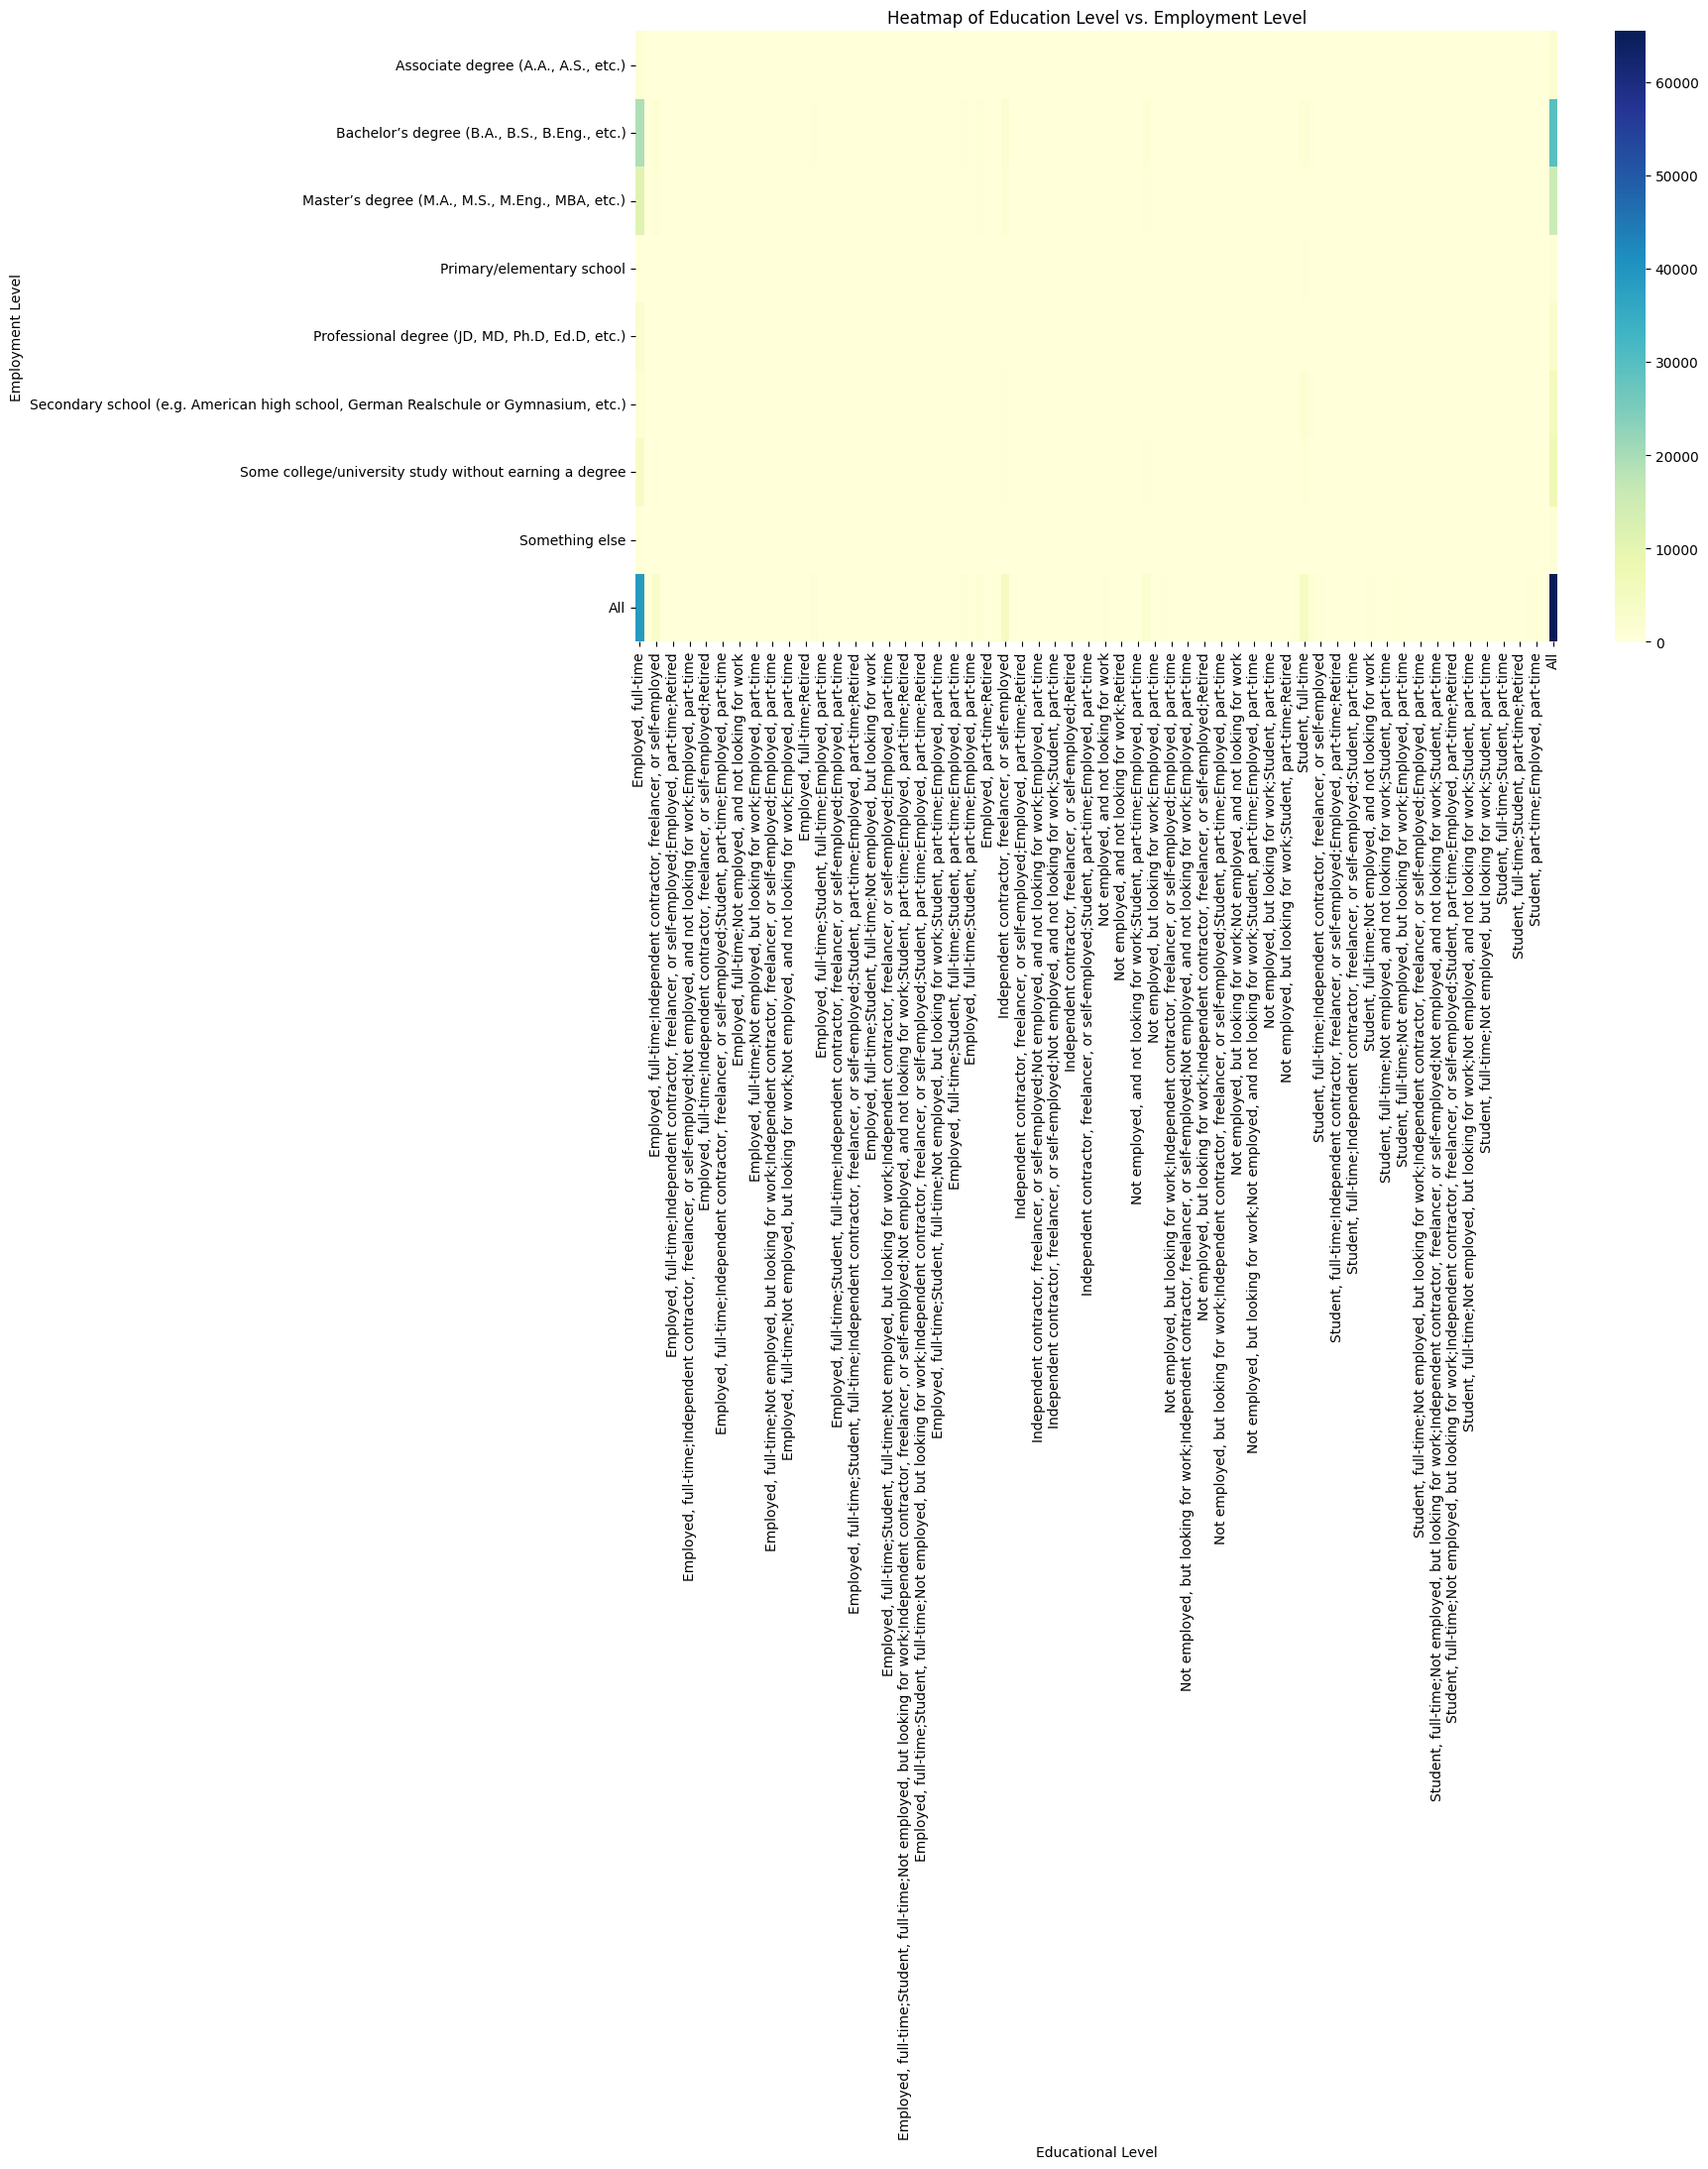

In [51]:
data = crosstab_Educ_vs_Emp 

plt.figure(figsize=(15, 8))

sns.heatmap(data, cmap="YlGnBu",)

plt.title("Heatmap of Education Level vs. Employment Level")
plt.xlabel("Educational Level")
plt.ylabel("Employment Level") 

plt.show() after taking my 

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
